In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from fractions import Fraction

import plotly.express as px

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

%matplotlib inline

In [159]:
#this is a custom function to open each dataset
def open_fuel_year(fuel_year):
    
    df = pd.read_csv('./clean_'+str(fuel_year)+'.csv', low_memory=False)
    
    return df

In [160]:
clean_df = pd.DataFrame()

years = [2008,2018]

#join the datasets
for fuel_year in years:
    clean_df = pd.concat([clean_df, open_fuel_year(fuel_year)])
    
    print(len(clean_df))
clean_df.reset_index(drop=True, inplace=True)

2207
3890


In [161]:
clean_df

,Unnamed: 0,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,0,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,1,2008,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4,no
2,2,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
3,3,2008,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,FA,SUV,6.0,17.0,22.0,19.0,5,no
4,4,2008,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1678,2018,VOLVO S90,2.0,40,SemiAuto-8,4WD,Electricity,FA,midsize car,7.0,70.0,72.0,71.0,10,Elite
3886,1679,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,CA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3887,1680,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,FA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3888,1681,2018,VOLVO XC 90,2.0,40,SemiAuto-8,4WD,Electricity,CA,standard SUV,7.0,63.0,61.0,62.0,10,Elite


In [162]:
clean_df.shape

(3890, 16)

In [163]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3890 entries, 0 to 3889
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            3890 non-null   int64  
 1   record_year           3890 non-null   int64  
 2   model                 3890 non-null   object 
 3   displ                 3890 non-null   float64
 4   cyl                   3890 non-null   int64  
 5   trans                 3890 non-null   object 
 6   drive                 3890 non-null   object 
 7   fuel                  3890 non-null   object 
 8   cert_region           3890 non-null   object 
 9   veh_class             3890 non-null   object 
 10  air_pollution_score   3890 non-null   float64
 11  city_mpg              3890 non-null   float64
 12  hwy_mpg               3890 non-null   float64
 13  cmb_mpg               3890 non-null   float64
 14  greenhouse_gas_score  3890 non-null   int64  
 15  smartway             

In [164]:
clean_df.query('greenhouse_gas_score == 0')

,Unnamed: 0,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
16,16,2008,ASTON MARTIN DB9,5.9,12,Man-6,2WD,Gasoline,FA,small car,6.0,10.0,16.0,12.0,0,no
18,18,2008,ASTON MARTIN DB9,5.9,12,Man-6,2WD,Gasoline,CA,small car,6.0,10.0,16.0,12.0,0,no
20,20,2008,ASTON MARTIN DB9 Volante,5.9,12,Man-6,2WD,Gasoline,FA,small car,6.0,10.0,16.0,12.0,0,no
22,22,2008,ASTON MARTIN DB9 Volante,5.9,12,Man-6,2WD,Gasoline,CA,small car,6.0,10.0,16.0,12.0,0,no
104,104,2008,BENTLEY Arnage,6.7,8,Auto-S6,2WD,Gasoline,FA,large car,6.0,9.0,15.0,11.0,0,no
105,105,2008,BENTLEY Arnage,6.7,8,Auto-S6,2WD,Gasoline,FA,midsize car,6.0,10.0,15.0,11.0,0,no
106,106,2008,BENTLEY Arnage,6.7,8,Auto-S6,2WD,Gasoline,CA,large car,6.0,9.0,15.0,11.0,0,no
107,107,2008,BENTLEY Arnage,6.7,8,Auto-S6,2WD,Gasoline,CA,midsize car,6.0,10.0,15.0,11.0,0,no
108,108,2008,BENTLEY Azure,6.7,8,Auto-S6,2WD,Gasoline,FA,small car,6.0,9.0,15.0,11.0,0,no
109,109,2008,BENTLEY Azure,6.7,8,Auto-S6,2WD,Gasoline,CA,small car,6.0,9.0,15.0,11.0,0,no


In [206]:
# Comparision of distributions of greenhouse gas score in 2008 and 2018.
greendist = clean_df.groupby(['record_year', 'greenhouse_gas_score']).count()['city_mpg']

In [230]:
v08 = clean_df.query('record_year == 2008')
v08
v18 = clean_df.query('record_year == 2018')
v18

,Unnamed: 0,record_year,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
2207,0,2018,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,FA,small SUV,3.0,20.0,28.0,23.0,5,No
2208,1,2018,ACURA RDX,3.5,60,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
2209,2,2018,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,FA,small SUV,3.0,19.0,27.0,22.0,4,No
2210,3,2018,ACURA RDX,3.5,60,SemiAuto-6,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
2211,4,2018,ACURA TLX,2.4,40,AMS-8,2WD,Gasoline,CA,small car,3.0,23.0,33.0,27.0,6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885,1678,2018,VOLVO S90,2.0,40,SemiAuto-8,4WD,Electricity,FA,midsize car,7.0,70.0,72.0,71.0,10,Elite
3886,1679,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,CA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3887,1680,2018,VOLVO XC 60,2.0,40,SemiAuto-8,4WD,Electricity,FA,small SUV,7.0,60.0,58.0,59.0,10,Elite
3888,1681,2018,VOLVO XC 90,2.0,40,SemiAuto-8,4WD,Electricity,CA,standard SUV,7.0,63.0,61.0,62.0,10,Elite


<AxesSubplot:>

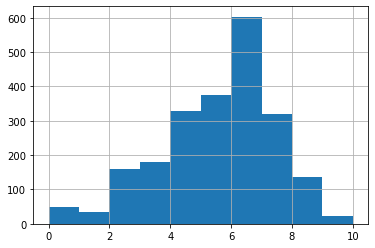

In [231]:
v08.greenhouse_gas_score.hist()

<AxesSubplot:>

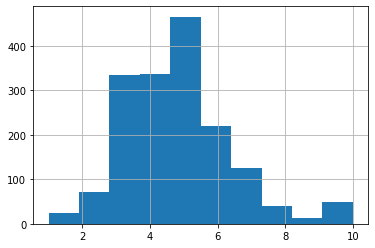

In [232]:
v18.greenhouse_gas_score.hist()

<AxesSubplot:>

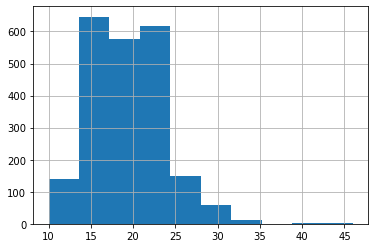

In [233]:
v08.cmb_mpg.hist()

<AxesSubplot:>

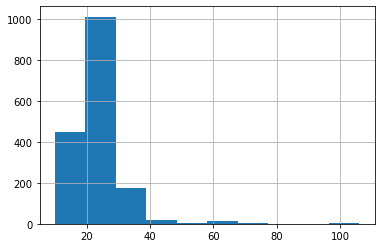

In [234]:
v18.cmb_mpg.hist()

In [166]:
greendist

record_year  greenhouse_gas_score
2008         0                        50
             1                        33
             2                       159
             3                       179
             4                       329
             5                       376
             6                       603
             7                       320
             8                       135
             9                        19
             10                        4
2018         1                        24
             2                        72
             3                       335
             4                       337
             5                       466
             6                       221
             7                       126
             8                        40
             9                        14
             10                       48
Name: city_mpg, dtype: int64

In [205]:
dist2018

0     0.000000
1     0.014260
2     0.042781
3     0.199049
4     0.200238
5     0.276887
6     0.131313
7     0.074866
8     0.023767
9     0.008318
10    0.028520
Name: city_mpg, dtype: float64

In [110]:
yeartotals = clean_df.groupby(['record_year',]).count()['city_mpg']
yeartotals

record_year
2008    2207
2018    1683
Name: city_mpg, dtype: int64

In [111]:
greendist[2008]

greenhouse_gas_score
0      50
1      33
2     159
3     179
4     329
5     376
6     603
7     320
8     135
9      19
10      4
Name: city_mpg, dtype: int64

In [112]:
dist2008 = greendist[2008] / yeartotals[2008]
dist2008

greenhouse_gas_score
0     0.022655
1     0.014952
2     0.072043
3     0.081106
4     0.149071
5     0.170367
6     0.273222
7     0.144993
8     0.061169
9     0.008609
10    0.001812
Name: city_mpg, dtype: float64

In [196]:
dist2018 = greendist[2018] / yeartotals[2018]
dist2018 = pd.concat([pd.Series([0]), dist2018], ignore_index=True)
distdf = pd.DataFrame(dist2018)
distdf = pd.concat([pd.Series(0), distdf])
distdf.fillna(0, inplace=True)
dist2018 = distdf.city_mpg

In [197]:
ind = np.arange(len(dist2008))  # the x locations for the groups
width = 0.35       # the width of the bars

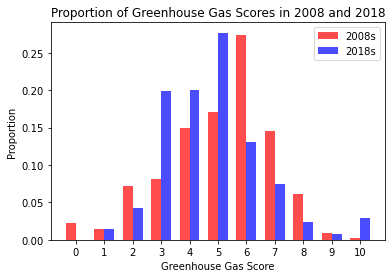

In [204]:
# plot bars
bars_08 = plt.bar(ind, dist2008, width, color='r', alpha=.7, label='2008s')
bars_18 = plt.bar(ind + width, dist2018, width, color='b', alpha=.7, label='2018s')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Greenhouse Gas Score')
plt.title('Proportion of Greenhouse Gas Scores in 2008 and 2018')
locations = ind + width / 2  # xtick locations
labels = ['0','1', '2', '3', '4', '5','6', '7', '8', '9', '10']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

In [52]:
a = pd.Series([2,3,4])
#pd.concat([pd.Series([1]], a, ignore_index = True))
pd.concat([pd.Series([1]), a], ignore_index = True)

0    1
1    2
2    3
3    4
dtype: int64

In [207]:
# Comparision of distributions of greenhouse gas score in 2008 and 2018.
cmbdist = clean_df.groupby(['record_year', 'cmb_mpg']).count()['city_mpg']

In [208]:
cmbdist

record_year  cmb_mpg
2008         10.0        32
             11.0        17
             12.0        51
             13.0        41
             14.0       160
                       ... 
2018         67.0         2
             71.0         4
             72.0         2
             97.0         2
             106.0        4
Name: city_mpg, Length: 69, dtype: int64

In [209]:
distcmb2008 = cmbdist[2008]/yeartotals[2008]

In [210]:
distcmb2008

cmb_mpg
10.0    0.014499
11.0    0.007703
12.0    0.023108
13.0    0.018577
14.0    0.072497
15.0    0.082012
16.0    0.074762
17.0    0.063435
18.0    0.082465
19.0    0.086090
20.0    0.093339
21.0    0.076121
22.0    0.092433
23.0    0.053013
24.0    0.058450
25.0    0.031264
26.0    0.020843
27.0    0.015406
28.0    0.012687
29.0    0.010874
30.0    0.000906
31.0    0.002719
32.0    0.003625
34.0    0.001359
42.0    0.000906
46.0    0.000906
Name: city_mpg, dtype: float64

In [212]:
distcmb2018 = cmbdist[2018]/yeartotals[2018]
distcmb2018

cmb_mpg
10.0     0.002377
11.0     0.001188
12.0     0.007130
13.0     0.007130
14.0     0.016043
15.0     0.019014
16.0     0.026738
17.0     0.045157
18.0     0.058229
19.0     0.084967
20.0     0.060012
21.0     0.066548
22.0     0.065954
23.0     0.084967
24.0     0.063577
25.0     0.077243
26.0     0.048128
27.0     0.061200
28.0     0.040404
29.0     0.033274
30.0     0.021390
31.0     0.017825
32.0     0.032086
33.0     0.010695
34.0     0.009507
35.0     0.005942
36.0     0.003565
37.0     0.003565
39.0     0.001188
40.0     0.001188
42.0     0.004753
46.0     0.003565
52.0     0.001188
59.0     0.001188
60.0     0.001188
62.0     0.001188
64.0     0.001188
65.0     0.001188
67.0     0.001188
71.0     0.002377
72.0     0.001188
97.0     0.001188
106.0    0.002377
Name: city_mpg, dtype: float64

ValueError: x and y must have same first dimension, but have shapes (11,) and (26,)

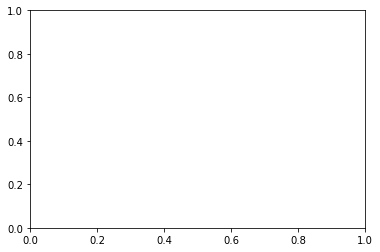

In [216]:
# plot bars
bars_08 = plt.plot(ind, distcmb2008, width, color='r', alpha=.7, label='2008s')
bars_18 = plt.plot(ind + width, distcmb2018, width, color='b', alpha=.7, label='2018s')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Greenhouse Gas Score')
plt.title('Proportion of Greenhouse Gas Scores in 2008 and 2018')
locations = ind + width / 2  # xtick locations
#labels = ['0','1', '2', '3', '4', '5','6', '7', '8', '9', '10']  # xtick labels
plt.xticks(locations,)

# legend
plt.legend()

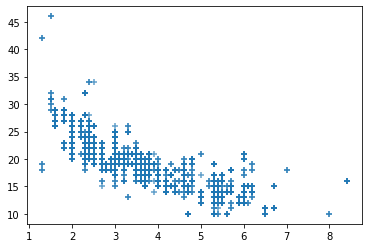

In [238]:
plt.scatter(v08.displ, v08.cmb_mpg, marker='+', alpha=.7)

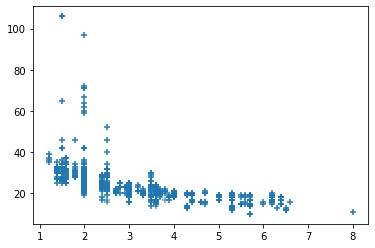

In [239]:
plt.scatter(v18.displ, v18.cmb_mpg, marker='+', alpha=.7)

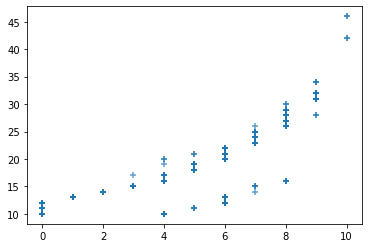

In [240]:
plt.scatter(v08.greenhouse_gas_score, v08.cmb_mpg, marker='+', alpha=.7)

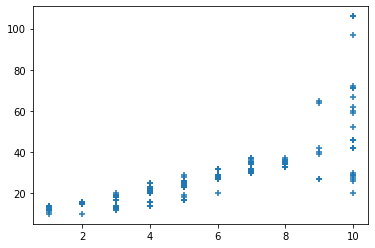

In [242]:
plt.scatter(v18.greenhouse_gas_score, v18.cmb_mpg, marker='+', alpha=.7)